# Kernel SHAP vs Tree SHAP
Experiments to understand the time complexity of SHAP approximations

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import sklearn.datasets as ds

import datetime

import shap
shap.initjs()

In [2]:
# Functions
def runSHAP(n,kernel=True): 
    """
    Calculate shap values and return time taken
        n: number of SHAP values to calculate
        kernel: set False if using TreeSHAP 
    """
    
    x_sample = X[np.random.choice(X.shape[0], n, replace=True)]
    
    begin = datetime.datetime.now()
    if kernel:
        #Caculate SHAP values using KernelSHAP
        shap_values = kernelSHAP.shap_values(x_sample,l1_reg=False)
        time = datetime.datetime.now() - begin
        print("Kernel {}: ".format(n), time)
    else:
        #Caculate SHAP values using TreeSHAP
        shap_values = treeSHAP(x_sample)
        time = datetime.datetime.now() - begin
        print("Tree {}: ".format(n), time)
    
    return time

def model_properties(model):
    """Returns average depth and number of features and leaves of a random forest"""
    
    depths = []
    features = []
    leaves = []
    
    for tree in model.estimators_:
        depths.append(tree.get_depth())
        leaves.append(tree.get_n_leaves())
        n_feat = len(set(tree.tree_.feature)) -1 
        features.append(n_feat)
        
    return np.mean(depths), np.mean(features), np.mean(leaves)

## Experiment 1: Number of samples

In [3]:
#Simulate regression data
data = ds.make_regression(n_samples=10000, n_features=10, n_informative=8, n_targets=1)

y= data[1]
X = data[0]

feature_names = range(len(X))

In [4]:
#Train model
model = RandomForestRegressor(n_estimators=100,max_depth=4,random_state=0)
model.fit(X, y)

RandomForestRegressor(max_depth=4, random_state=0)

In [5]:
#Get shap estimators
kernelSHAP = shap.KernelExplainer(model.predict,shap.sample(X, 10))
treeSHAP = shap.TreeExplainer(model)

In [6]:
results = []
for n in [10,100,1000,2000,5000,10000]*3:
    #Calculate SHAP Values
    kernel_time = runSHAP(n=n)
    tree_time = runSHAP(n=n,kernel=False)
    
    result = [n,kernel_time,tree_time]
    results.append(result)
    
results_1 = pd.DataFrame(results,columns = ['n','kernelSHAP','treeSHAP'])

  0%|          | 0/10 [00:00<?, ?it/s]

Kernel 10:  0:00:00.496101
Tree 10:  0:00:00.001554


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.200646
Tree 100:  0:00:00.014284


  0%|          | 0/1000 [00:00<?, ?it/s]

Kernel 1000:  0:00:53.408023
Tree 1000:  0:00:00.097730


  0%|          | 0/2000 [00:00<?, ?it/s]

Kernel 2000:  0:01:47.093446
Tree 2000:  0:00:00.207026


  0%|          | 0/5000 [00:00<?, ?it/s]

Kernel 5000:  0:04:27.343917
Tree 5000:  0:00:00.504254


  0%|          | 0/10000 [00:00<?, ?it/s]

Kernel 10000:  0:08:47.319592
Tree 10000:  0:00:02.552168


  0%|          | 0/10 [00:00<?, ?it/s]

Kernel 10:  0:00:00.540252
Tree 10:  0:00:00.001525


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.104183
Tree 100:  0:00:00.011549


  0%|          | 0/1000 [00:00<?, ?it/s]

Kernel 1000:  0:00:51.560526
Tree 1000:  0:00:00.102579


  0%|          | 0/2000 [00:00<?, ?it/s]

Kernel 2000:  0:01:45.452856
Tree 2000:  0:00:00.213702


  0%|          | 0/5000 [00:00<?, ?it/s]

Kernel 5000:  0:04:24.764188
Tree 5000:  0:00:00.499218


  0%|          | 0/10000 [00:00<?, ?it/s]

Kernel 10000:  0:08:46.055531
Tree 10000:  0:00:01.026259


  0%|          | 0/10 [00:00<?, ?it/s]

Kernel 10:  0:00:00.573395
Tree 10:  0:00:00.001387


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:07.489044
Tree 100:  0:00:00.012339


  0%|          | 0/1000 [00:00<?, ?it/s]

Kernel 1000:  0:00:53.143686
Tree 1000:  0:00:00.103253


  0%|          | 0/2000 [00:00<?, ?it/s]

Kernel 2000:  0:01:46.412336
Tree 2000:  0:00:00.226835


  0%|          | 0/5000 [00:00<?, ?it/s]

Kernel 5000:  0:04:24.787325
Tree 5000:  0:00:00.508407


  0%|          | 0/10000 [00:00<?, ?it/s]

Kernel 10000:  0:08:50.672783
Tree 10000:  0:00:03.216026


In [7]:
avg_1 = results_1.groupby(by='n',as_index=False).mean()
avg_1

,n,kernelSHAP,treeSHAP
0,10,0 days 00:00:00.536582666,0 days 00:00:00.001488666
1,100,0 days 00:00:05.931291,0 days 00:00:00.012724
2,1000,0 days 00:00:52.704078333,0 days 00:00:00.101187333
3,2000,0 days 00:01:46.319546,0 days 00:00:00.215854333
4,5000,0 days 00:04:25.631810,0 days 00:00:00.503959666
5,10000,0 days 00:08:48.015968666,0 days 00:00:02.264817666


0    360.606183
1    466.149874
2    520.858193
3    492.553050
4    527.090120
5    233.138469
Name: n, dtype: float64


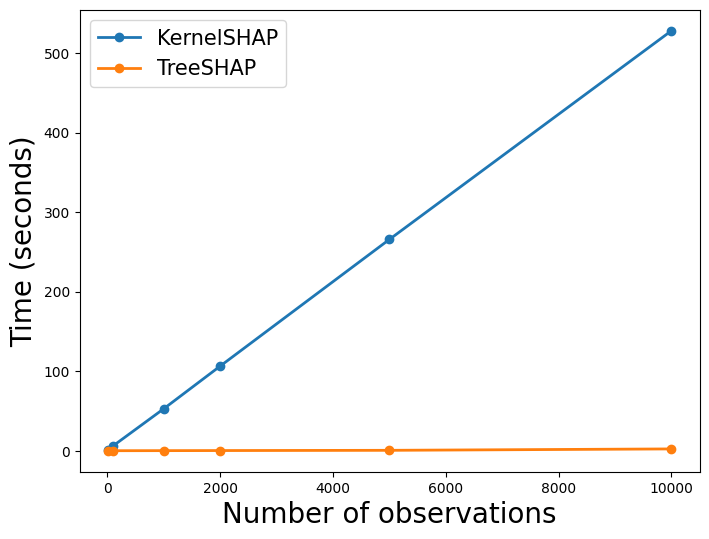

In [8]:
#Find average run time
avg_1 = results_1.groupby(by='n',as_index=False).mean()

k_sec = [t.total_seconds() for t in avg_1['kernelSHAP']]
t_sec = [t.total_seconds() for t in avg_1['treeSHAP']]
n = avg_1['n']

#Proportional run time
print((k_sec/n)/(t_sec/n))

#Plot run time by number of observations
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.plot(n, k_sec, linestyle='-', linewidth=2,marker='o',label = 'KernelSHAP')
plt.plot(n, t_sec, linestyle='-', linewidth=2,marker='o',label = 'TreeSHAP')

plt.ylabel('Time (seconds)',size=20)
plt.xlabel('Number of observations',size=20)
plt.legend(fontsize=15)

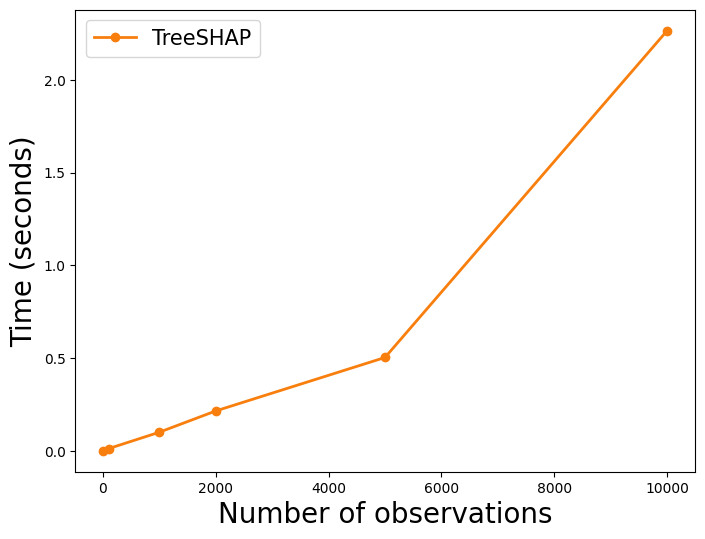

In [9]:
#Number of observations
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.plot(n, t_sec, linestyle='-', color='#F87F0E',linewidth=2,marker='o',label = 'TreeSHAP')

plt.ylabel('Time (seconds)',size=20)
plt.xlabel('Number of observations',size=20)
plt.legend(fontsize=15)

## Experiment 2: number of features
    

In [10]:
results = []

for n_features, n_informative in zip([2,4,6,8,10,12,13,14,16,18,20]*3,[2,4,6,8,10,12,13,14,16,18,20]*3):
    
    #Simulate regression data
    data = ds.make_regression(n_samples=10000, n_features=n_features, n_informative=n_informative, n_targets=1,noise=0.1)

    y= data[1]
    X = data[0]

    feature_names = range(len(X))

    #Train model
    model = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=0)
    model.fit(X, y)
    
    #get model properties
    avg_depth, avg_feat, avg_leaves = model_properties(model)
    
    #Get shap estimators
    kernelSHAP = shap.KernelExplainer(model.predict,shap.sample(X, 10))
    treeSHAP = shap.TreeExplainer(model)
    
    #Calculate SHAP values
    kernel_time = runSHAP(n=100)
    tree_time = runSHAP(n=100,kernel=False)
    
    result = [n_features, avg_depth, avg_feat, avg_leaves, kernel_time,tree_time]
    results.append(result)

results_2 = pd.DataFrame(results,columns = ['n_features','avg_depth', 'avg_feat', 'avg_leaves','kernelSHAP','treeSHAP'])


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:00.625113
Tree 100:  0:00:00.532960


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:00.785307
Tree 100:  0:00:00.882772


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:01.187711
Tree 100:  0:00:01.191274


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:02.431737
Tree 100:  0:00:01.321393


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:06.570502
Tree 100:  0:00:03.435666


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:14.568197
Tree 100:  0:00:01.789498


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:17.344145
Tree 100:  0:00:01.728422


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:20.576827
Tree 100:  0:00:02.274067


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:16.055168
Tree 100:  0:00:01.797285


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:16.493770
Tree 100:  0:00:02.325634


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:17.228103
Tree 100:  0:00:02.408891


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:00.577891
Tree 100:  0:00:00.482021


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:00.744366
Tree 100:  0:00:00.934879


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:01.056252
Tree 100:  0:00:03.156549


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:02.379856
Tree 100:  0:00:01.322113


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:07.169121
Tree 100:  0:00:02.003133


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:16.777865
Tree 100:  0:00:02.161629


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:17.437200
Tree 100:  0:00:02.276480


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:16.581108
Tree 100:  0:00:01.961274


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:17.014973
Tree 100:  0:00:02.218217


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:19.618564
Tree 100:  0:00:02.483560


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:20.445615
Tree 100:  0:00:02.433542


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:00.550949
Tree 100:  0:00:00.477795


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:00.771931
Tree 100:  0:00:00.935587


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:01.237842
Tree 100:  0:00:01.231075


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:02.361585
Tree 100:  0:00:03.922433


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:07.612346
Tree 100:  0:00:02.160293


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:18.972786
Tree 100:  0:00:02.667466


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:25.747082
Tree 100:  0:00:03.345663


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:31.033032
Tree 100:  0:00:03.026935


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:34.601463
Tree 100:  0:00:06.278845


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:35.806097
Tree 100:  0:00:03.403465


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:35.291911
Tree 100:  0:00:02.681171


0     1.174961
1     0.835962
2     0.624103
3     1.092483
4     2.809806
5     7.602652
6     8.234528
7     9.389754
8     6.573666
9     8.757021
10    9.698228
Name: n_features, dtype: float64


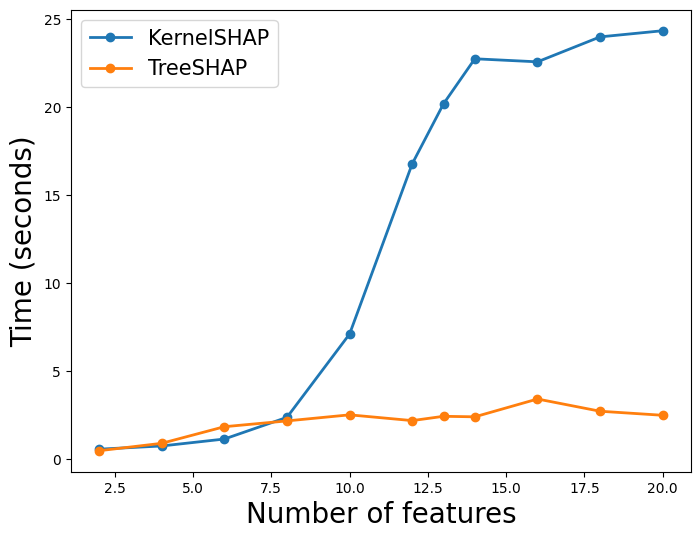

In [11]:
#Get average run time
avg_2 = results_2[['n_features','kernelSHAP','treeSHAP']].groupby(by='n_features',as_index=False).mean()

k_sec = [t.total_seconds() for t in avg_2['kernelSHAP']]
t_sec = [t.total_seconds() for t in avg_2['treeSHAP']]
n = avg_2['n_features']

print((k_sec/n)/(t_sec/n))

#Plot run time by number of features
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.plot(n, k_sec, linestyle='-', linewidth=2,marker='o',label = 'KernelSHAP')
plt.plot(n, t_sec, linestyle='-', linewidth=2,marker='o',label = 'TreeSHAP')

plt.ylabel('Time (seconds)',size=20)
plt.xlabel('Number of features',size=20)
plt.legend(fontsize=15)

## Experiment 3: number of trees

In [12]:
#Simulate regression data
data = ds.make_regression(n_samples=10000, n_features=10, n_informative=8, n_targets=1)

y= data[1]
X = data[0]

feature_names = range(len(X))

In [13]:
results = []

for trees in [10,20,50,100,200,500,1000]*3:
    #Train model
    model = RandomForestRegressor(n_estimators=trees,max_depth=4,random_state=0)
    model.fit(X, y)
    
    #Get shap estimators
    kernelSHAP = shap.KernelExplainer(model.predict,shap.sample(X, 10))
    treeSHAP = shap.TreeExplainer(model)
    
    #Calculate SHAP Values
    kernel_time = runSHAP(n=100)
    tree_time = runSHAP(n=100,kernel=False)
    
    result = [trees,kernel_time,tree_time]
    results.append(result)

results_3 = pd.DataFrame(results,columns = ['trees','kernelSHAP','treeSHAP'])

  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:04.688475
Tree 100:  0:00:00.001449


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:04.089273
Tree 100:  0:00:00.002144


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:04.473499
Tree 100:  0:00:00.004992


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.100728
Tree 100:  0:00:00.010426


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:08.867286
Tree 100:  0:00:00.018249


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:11.633238
Tree 100:  0:00:00.053310


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:20.790195
Tree 100:  0:00:00.095239


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:03.716802
Tree 100:  0:00:00.001228


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:03.711485
Tree 100:  0:00:00.002163


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:04.329158
Tree 100:  0:00:00.005586


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.021186
Tree 100:  0:00:00.010293


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:06.485941
Tree 100:  0:00:00.019538


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:11.499782
Tree 100:  0:00:00.046808


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:20.967031
Tree 100:  0:00:00.095390


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:03.761480
Tree 100:  0:00:00.001265


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:03.952714
Tree 100:  0:00:00.002282


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:04.185808
Tree 100:  0:00:00.004798


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.029283
Tree 100:  0:00:00.009860


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:07.021091
Tree 100:  0:00:00.022692


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:11.183241
Tree 100:  0:00:00.047330


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:20.994707
Tree 100:  0:00:00.093028


0    3086.442161
1    1784.072860
2     844.778146
3     495.477190
4     369.964086
5     232.736231
6     221.225474
Name: trees, dtype: float64


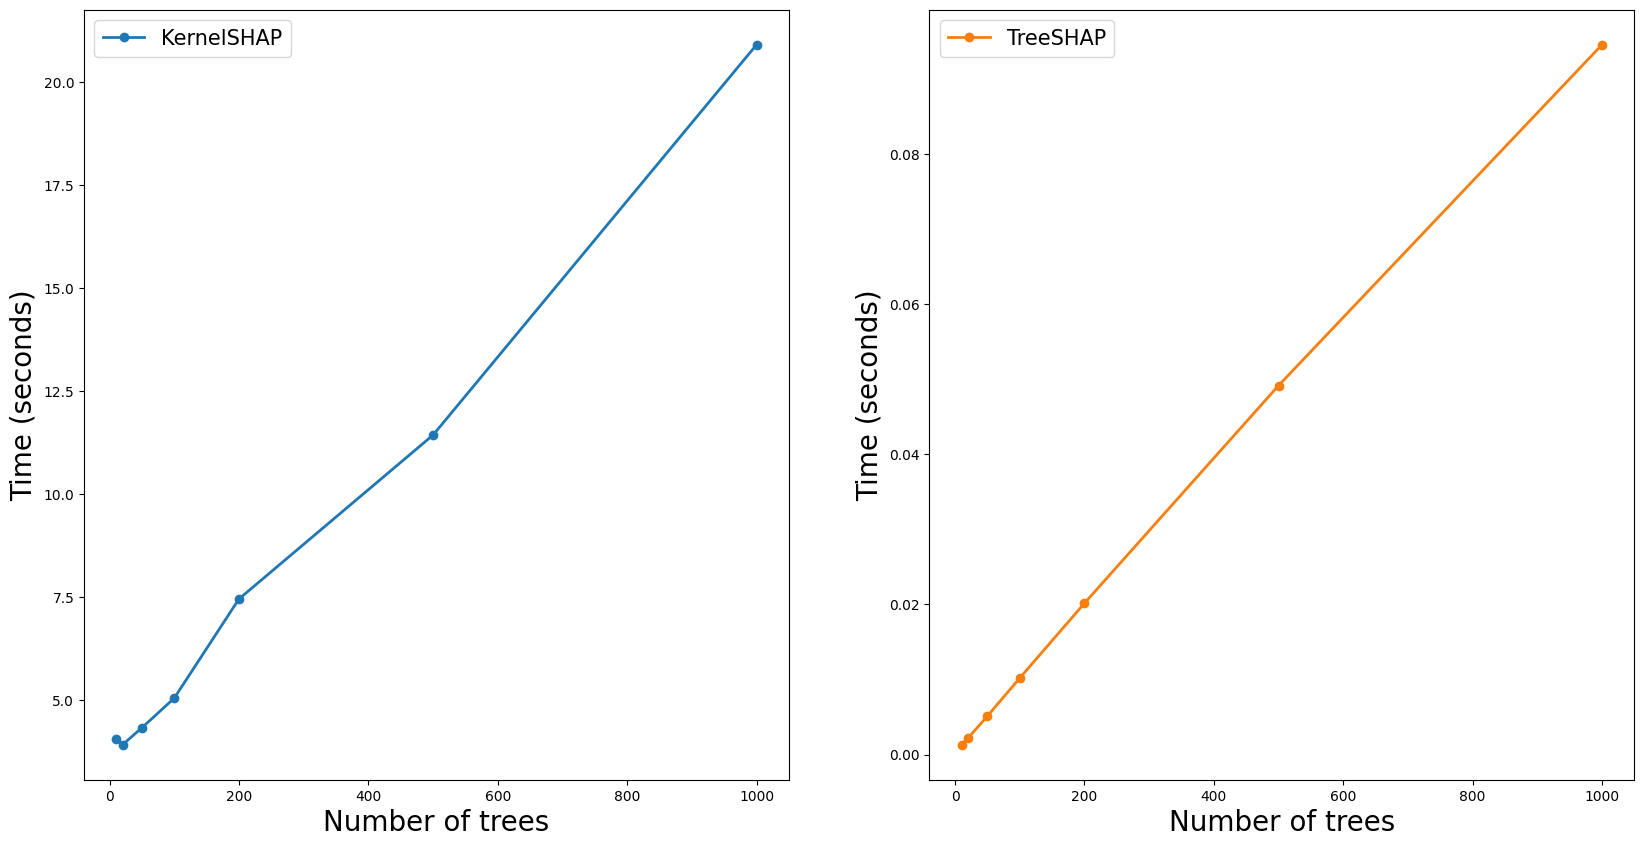

In [14]:
#Get average run time
avg_3 = results_3.groupby(by='trees',as_index=False).mean()

k_sec = [t.total_seconds() for t in avg_3['kernelSHAP']]
t_sec = [t.total_seconds() for t in avg_3['treeSHAP']]
trees = avg_3['trees']

print((k_sec/trees)/(t_sec/trees))

#Plot run time by number of trees
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

ax[0].plot(trees, k_sec, linestyle='-', linewidth=2,marker='o',label = 'KernelSHAP')
ax[0].set_ylabel('Time (seconds)',size=20)
ax[0].set_xlabel('Number of trees',size=20)
ax[0].legend(fontsize=15)

ax[1].plot(trees, t_sec, color='#F87F0E', linewidth=2,marker='o',label = 'TreeSHAP')
ax[1].set_ylabel('Time (seconds)',size=20)
ax[1].set_xlabel('Number of trees',size=20)
ax[1].legend(fontsize=15)

## Experiment 4: tree depth

In [15]:
#Simulate regression data
data = ds.make_regression(n_samples=10000, n_features=10, n_informative=8, n_targets=1)

y= data[1]
X = data[0]

feature_names = range(len(X))

results = []

#for depth in [2,4,6]:
for depth in [2,4,6,8,10,15,20]*3:

    #Train model
    model = RandomForestRegressor(n_estimators=100,max_depth=depth,random_state=0)
    model.fit(X, y)
    
    #get model properties
    avg_depth, avg_feat, avg_leaves = model_properties(model)
    
    #Get shap estimators
    kernelSHAP = shap.KernelExplainer(model.predict,shap.sample(X, 10))
    treeSHAP = shap.TreeExplainer(model)
    
    #Calculate SHAP values
    kernel_time = runSHAP(n=100)
    tree_time = runSHAP(n=100,kernel=False)
    
    result = [depth, avg_depth, avg_feat, avg_leaves, kernel_time,tree_time]
    results.append(result)

results_4 = pd.DataFrame(results,columns = ['depth','avg_depth', 'avg_feat', 'avg_leaves','kernelSHAP','treeSHAP'])

  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.249265
Tree 100:  0:00:00.001909


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.067690
Tree 100:  0:00:00.010428


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.707490
Tree 100:  0:00:00.061213


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:06.370387
Tree 100:  0:00:00.352147


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:06.730409
Tree 100:  0:00:01.555382


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:11.330743
Tree 100:  0:00:11.068794


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:09.293782
Tree 100:  0:00:18.088779


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:04.727855
Tree 100:  0:00:00.002135


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.211964
Tree 100:  0:00:00.013911


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:08.141692
Tree 100:  0:00:00.061339


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.954699
Tree 100:  0:00:00.365439


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:06.892007
Tree 100:  0:00:01.642163


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:08.797827
Tree 100:  0:00:10.940345


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:11.960290
Tree 100:  0:00:15.298271


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:04.713315
Tree 100:  0:00:00.003143


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:07.439597
Tree 100:  0:00:00.010933


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:05.615453
Tree 100:  0:00:00.063261


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:06.171626
Tree 100:  0:00:00.335475


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:06.747607
Tree 100:  0:00:03.920706


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:08.807381
Tree 100:  0:00:11.128812


  0%|          | 0/100 [00:00<?, ?it/s]

Kernel 100:  0:00:11.386583
Tree 100:  0:00:15.727678


Text(0.5, 0, 'Tree depth')

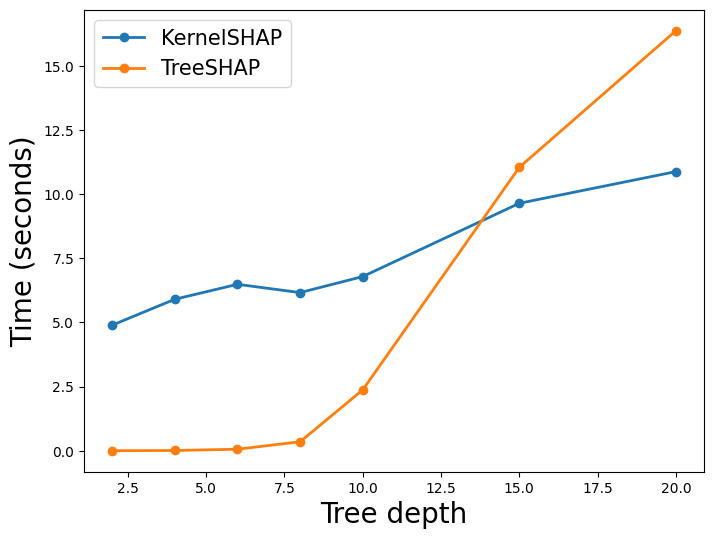

In [16]:
#Get average run time
avg_4 = results_4[['depth','kernelSHAP','treeSHAP']].groupby(by='depth',as_index=False).mean()

k_sec = [t.total_seconds() for t in avg_4['kernelSHAP']]
t_sec = [t.total_seconds() for t in avg_4['treeSHAP']]
depth = avg_4['depth']

#Plot run tume by tree depth
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,6))

plt.plot(depth, k_sec, linestyle='-', linewidth=2,marker='o',label = 'KernelSHAP')
plt.plot(depth, t_sec, linestyle='-', linewidth=2,marker='o',label = 'TreeSHAP')
plt.legend(fontsize=15)

plt.ylabel('Time (seconds)',size=20)
plt.xlabel('Tree depth',size=20)

Text(0.5, 0, 'Tree depth')

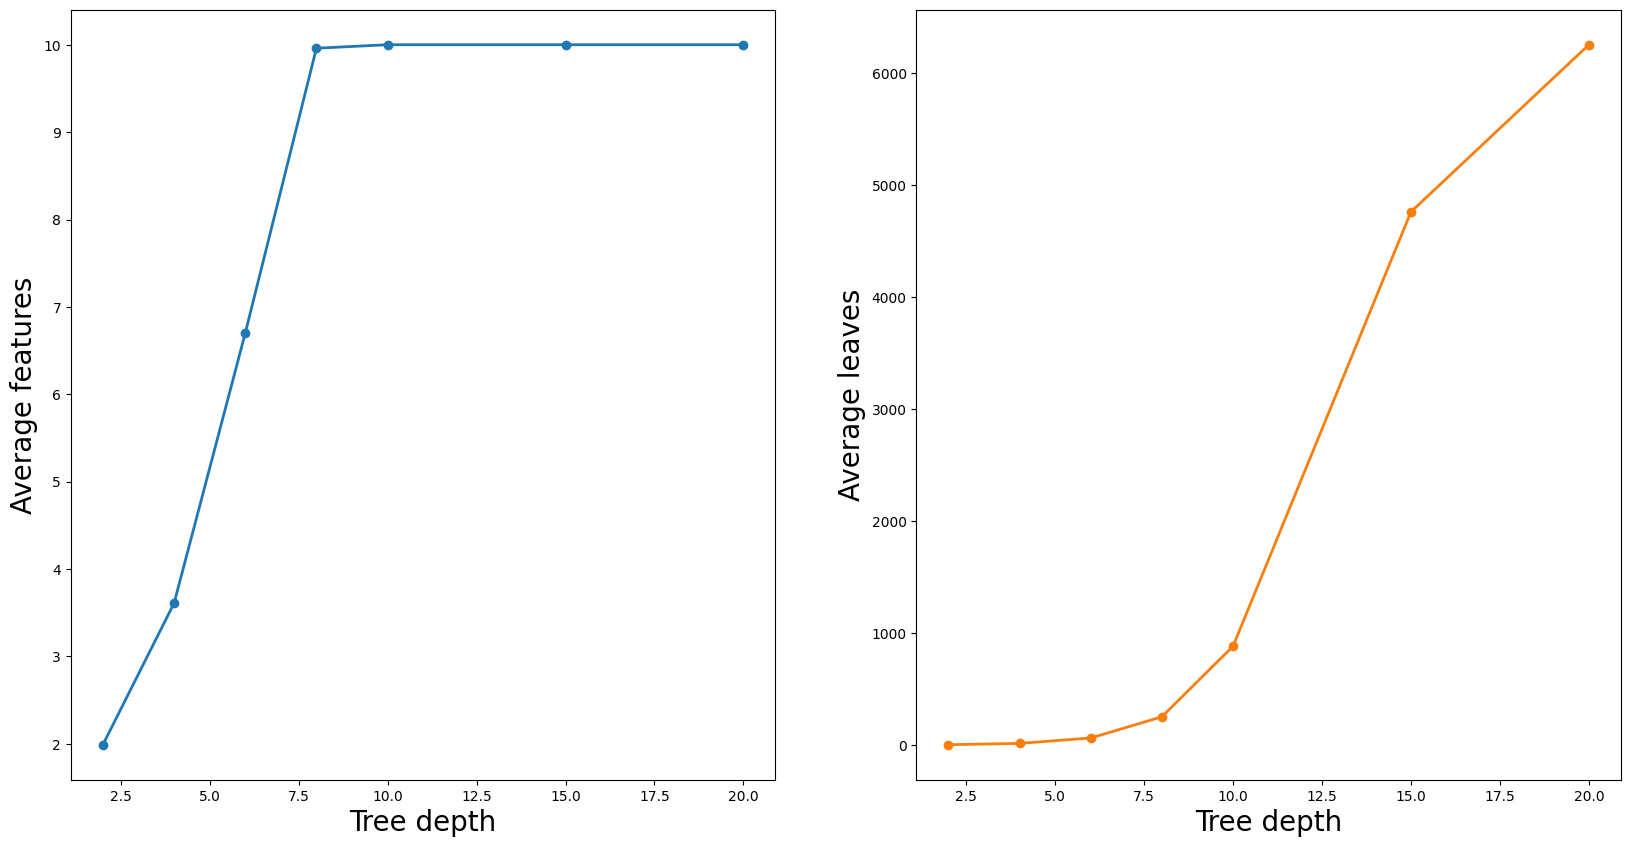

In [17]:
#Other factors
r4 = results_4[['depth','avg_depth','avg_feat','avg_leaves']].groupby(by='depth',as_index=False).mean()

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))

ax[0].plot(r4['depth'], r4['avg_feat'], linestyle='-', linewidth=2,marker='o')
ax[0].set_ylabel('Average features',size=20)
ax[0].set_xlabel('Tree depth',size=20)

ax[1].plot(r4['depth'], r4['avg_leaves'], color='#F87F0E', linewidth=2,marker='o')
ax[1].set_ylabel('Average leaves',size=20)
ax[1].set_xlabel('Tree depth',size=20)

# Archive 

In [18]:
#
data = ds.make_regression(n_samples=10000, n_features=10, n_informative=8, n_targets=1)

y= data[1]
X = data[0]

feature_names = range(len(X))

depth = 10 # vary this value 
model = RandomForestRegressor(n_estimators=100,max_depth=depth,random_state=0)
model.fit(X, y)

model_properties(model)

(10.0, 10.0, 897.99)

In [19]:
#Simulate regression data
data = ds.make_regression(n_samples=10000, n_features=20, n_informative=20, n_targets=1,noise=0.1)

y= data[1]
X = data[0]

feature_names = range(len(X))

#Train model
model = RandomForestRegressor(n_estimators=100,max_depth=10,random_state=0)
model.fit(X, y)

#get model properties
avg_depth, avg_feat, avg_leaves = model_properties(model)


#Get shap estimators
treeSHAP = shap.TreeExplainer(model)
kernelSHAP = shap.KernelExplainer(model.predict,shap.sample(X, 20))

#get shap values 
x_sample = X[np.random.choice(X.shape[0], 100, replace=True)]
sv_tree = treeSHAP.shap_values(x_sample)
sv_kernel = kernelSHAP.shap_values(x_sample,l1_reg=0.1)

print(len(sv_tree[0]),len(sv_kernel[0]))

  0%|          | 0/100 [00:00<?, ?it/s]

20 20
